<a href="https://colab.research.google.com/github/Gopizone/DataScience/blob/main/Forecasting_Model_Arima(Delhi).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
from google.colab import files
files=files.upload()

Saving Delhi.xlsx to Delhi (3).xlsx


In [3]:
df = pd.read_excel (r'Delhi.xlsx',header=0, parse_dates=True)

In [4]:
# Import libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 3000)
from scipy import interpolate
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
#df = pd.read_csv('delhi.csv')
df.head()

,date,pm25
0,2018-04-20 00:00:00,92
1,2018-04-19 23:00:00,89
2,2018-04-19 22:00:00,75
3,2018-04-19 21:00:00,57
4,2018-04-19 20:00:00,57


In [5]:

df['date']=pd.to_datetime(df['date'],format='%d-%m-%Y %H:%M')


In [6]:
df['pm25'] = df['pm25'].replace('-',np.nan)
df['pm25']=df['pm25'].astype(str).astype(float)
df['pm25_U']=df['pm25']

In [7]:
start=df.date.min()
stop=df.date.max()
seriesDate=[]

while start < stop:
    start = start + timedelta(hours=1)
    seriesDate.append(start)

df3 = pd.DataFrame(columns = ['date', 'pm25']) 
df3['date']=seriesDate


In [8]:
result = pd.merge(df, df3, on="date", how="outer")


In [9]:
result=result.drop(columns=['pm25_y'])
result=result.rename(columns={"pm25_x": "pm25"})
result.count()

date      2617
pm25      2294
pm25_U    2294
dtype: int64

In [10]:
result=result.sort_values(by='date')
result = result.reset_index(drop=True)
result.tail()

,date,pm25,pm25_U
2612,2018-04-19 20:00:00,57.0,57.0
2613,2018-04-19 21:00:00,57.0,57.0
2614,2018-04-19 22:00:00,75.0,75.0
2615,2018-04-19 23:00:00,89.0,89.0
2616,2018-04-20 00:00:00,92.0,92.0


In [11]:
df=result

In [12]:
df_missing=df[(df['pm25'].isnull()==True)]
df_missing['date']=pd.to_datetime(df_missing['date'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
df = df.dropna()
df.count()

date      2294
pm25      2294
pm25_U    2294
dtype: int64

In [14]:
df_missing.count()

date      323
pm25        0
pm25_U      0
dtype: int64

## Handling missing data -  mean before after method - mean of indentical hour in the week  (+3 , -3)

In [15]:
def timewise_mean(arg_date):
    df1=df[(df['date'].dt.hour == arg_date.hour) & (df['date'].dt.day > arg_date.day-3) & (df['date'].dt.day < arg_date.day+3)] 
    return df1.pm25.mean()

for index,row in df_missing.iterrows():
    df_missing.at[index, 'pm25_U'] =timewise_mean(row['date'])
    

In [16]:
df2 = df.append(df_missing)
df2.pm25_U.count()
df2['date']=pd.to_datetime(df2['date'])
df2['pm25']=df2['pm25'].astype(str).astype(float)
df2['pm25_U']=df2['pm25_U'].astype(str).astype(float)

In [17]:
df2=df2.sort_values(by='date')

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2617 entries, 0 to 2616
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2617 non-null   datetime64[ns]
 1   pm25    2294 non-null   float64       
 2   pm25_U  2617 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 81.8 KB


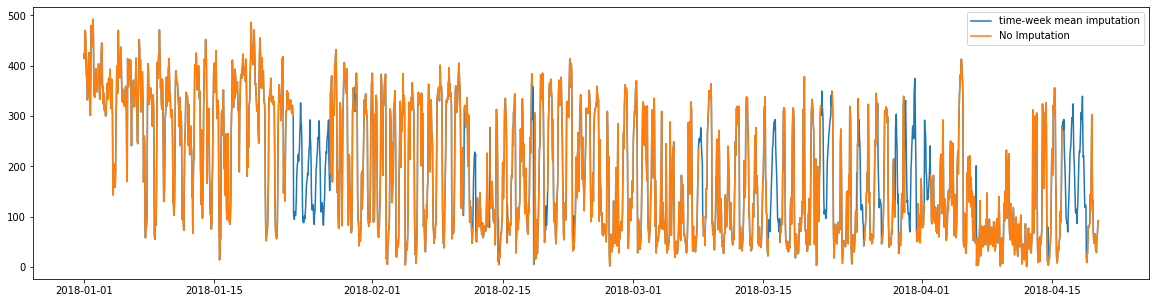

In [19]:
import matplotlib.pyplot as plt
RN=[]
for i in range(0,df2.pm25_U.count()):
    RN.append(i)
plt.figure(figsize=(20,5))

plt.plot(df2['date'], df2['pm25_U'])
plt.plot(df2['date'], df2['pm25'])
labels = []
labels.append('time-week mean imputation')
labels.append('No Imputation')
plt.legend(labels)

In [20]:
df_Jan=df2.loc[(df2['date'].dt.day >= 15) & (df2['date'].dt.day <= 30) & (df2['date'].dt.month == 1)] 


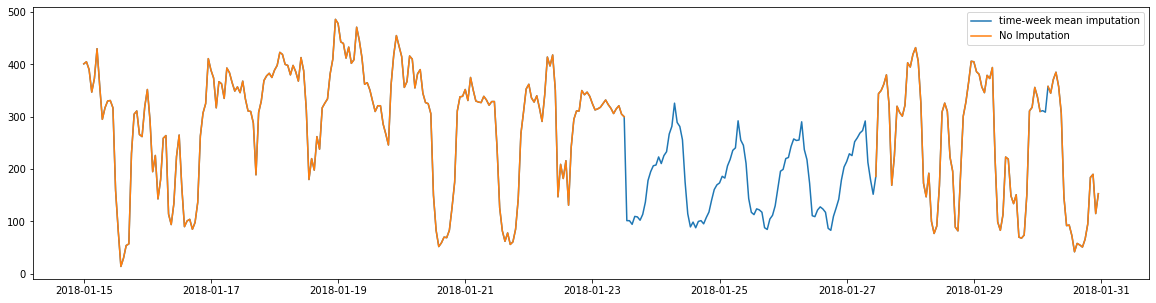

In [21]:

RN=[]
for i in range(0,df_Jan.pm25_U.count()):
    RN.append(i)
plt.figure(figsize=(20,5))

plt.plot(df_Jan['date'], df_Jan['pm25_U'])
plt.plot(df_Jan['date'], df_Jan['pm25'])
labels = []
labels.append('time-week mean imputation')
labels.append('No Imputation')
plt.legend(labels)

In [100]:
df=df2

In [101]:
df.tail()

,date,pm25,pm25_U
2612,2018-04-19 20:00:00,57.0,57.0
2613,2018-04-19 21:00:00,57.0,57.0
2614,2018-04-19 22:00:00,75.0,75.0
2615,2018-04-19 23:00:00,89.0,89.0
2616,2018-04-20 00:00:00,92.0,92.0


In [102]:
df=df.drop(columns=['pm25'])

In [103]:
df=df.set_index('date')

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2617 entries, 2018-01-01 00:00:00 to 2018-04-20 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pm25_U  2617 non-null   float64
dtypes: float64(1)
memory usage: 40.9 KB


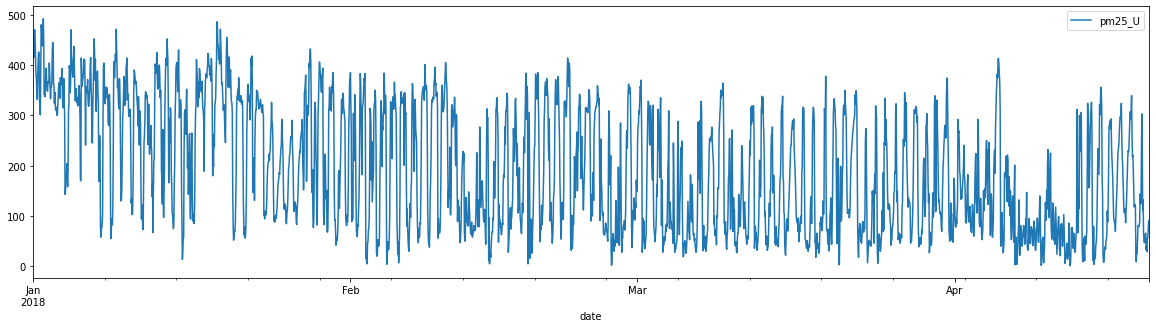

In [105]:
from pandas import read_csv
from matplotlib import pyplot
df.plot(figsize=(20,5))
pyplot.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac466ab860>]],
      dtype=object)

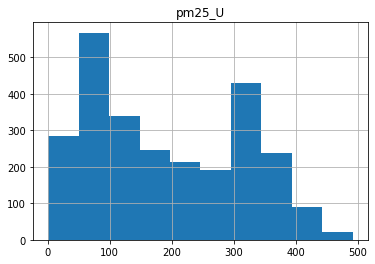

In [106]:
df.hist()

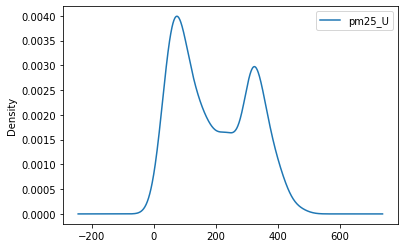

In [107]:
df.plot(kind='kde')

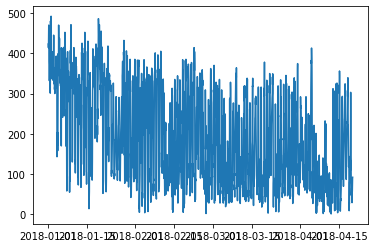

In [112]:
plt.plot(df)


ACF plots and PACF plots

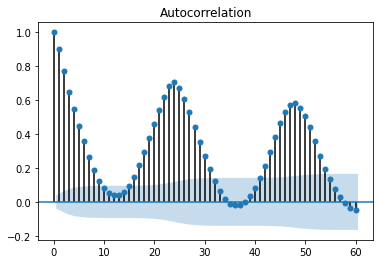

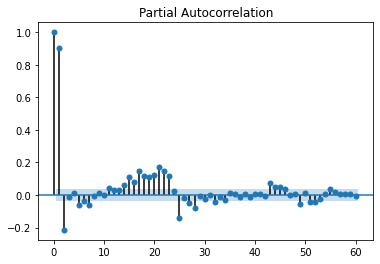

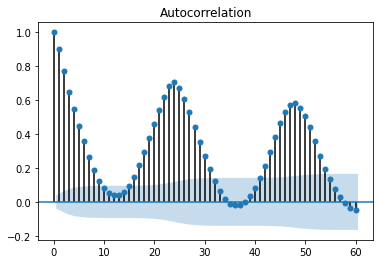

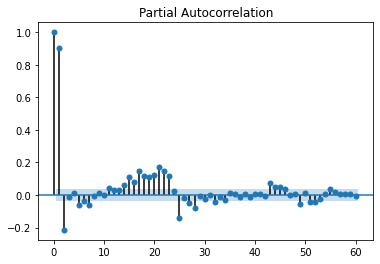

In [111]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df.pm25_U,lags=60)
tsa_plots.plot_pacf(df.pm25_U,lags=60)
plt.show()

In [113]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [114]:

# separate out a validation dataset
dataset = df.head(2593)
validation = df.tail(24)
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 2593, Validation 24


Persistence/ Base model

In [115]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.80)
train, test = X[0:train_size], X[train_size:]

In [116]:

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=298.000, Expected=154.000
>Predicted=154.000, Expected=82.000
>Predicted=82.000, Expected=53.000
>Predicted=53.000, Expected=39.000
>Predicted=39.000, Expected=49.000
>Predicted=49.000, Expected=57.000
>Predicted=57.000, Expected=46.000
>Predicted=46.000, Expected=44.000
>Predicted=44.000, Expected=52.000
>Predicted=52.000, Expected=73.000
>Predicted=73.000, Expected=66.000
>Predicted=66.000, Expected=95.000
>Predicted=95.000, Expected=148.000
>Predicted=148.000, Expected=198.000
>Predicted=198.000, Expected=215.000
>Predicted=215.000, Expected=151.000
>Predicted=151.000, Expected=118.000
>Predicted=118.000, Expected=99.000
>Predicted=99.000, Expected=130.000
>Predicted=130.000, Expected=278.250
>Predicted=278.250, Expected=279.250
>Predicted=279.250, Expected=303.625
>Predicted=303.625, Expected=256.000
>Predicted=256.000, Expected=237.143
>Predicted=237.143, Expected=163.286
>Predicted=163.286, Expected=126.667
>Predicted=126.667, Expected=144.333
>Predicted=144.333, Expec

ARIMA Hyperparameters

In [136]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [157]:
X = X.astype('float32')
train_size = int(len(X) * 0.80)
train, test = X[0:train_size], X[train_size:]
model=ARIMA(train,order=(4,1,4)).fit(disp=0)
pred=model.forecast(steps=24)[0]
pred

rmse_arima = sqrt(mean_squared_error(test, predictions))

array([266.63533225, 232.18913469, 204.40745647, 178.34074745,
       155.38749204, 142.01161243, 132.52846737, 128.32255329,
       132.77445133, 139.87851623, 150.85416099, 166.86638407,
       182.3650625 , 198.72405223, 215.96144143, 229.70287112,
       241.80930477, 251.98342038, 257.36620099, 260.35490807,
       260.71774044, 256.98649178, 251.82083018, 245.03340614])

In [158]:
rmse_arima

49.08483269586696

Grid search for p,d,q values

In [139]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f'% (best_cfg, best_score))

In [140]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters

p_values = range(0, 5)
d_values = range(1)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

Best ARIMANone RMSE=inf


Build Model based on the optimized values

In [141]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [142]:
# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

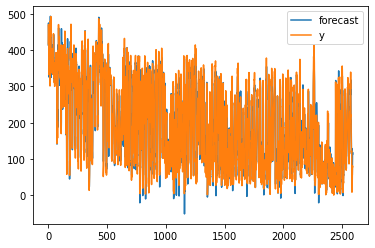

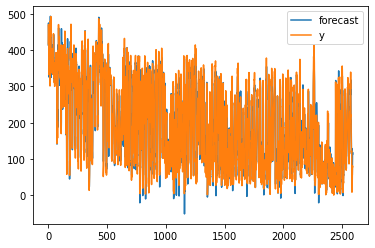

In [143]:
# fit model
model = ARIMA(X, order=(4,1,4))
model_fit = model.fit()
forecast=model_fit.forecast(steps=24)[0]
model_fit.plot_predict()

In [144]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

57.41482204921323

In [149]:
model = ARIMA(X, order=(4,1,4))
model_fit = model.fit()

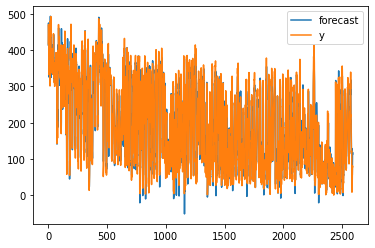

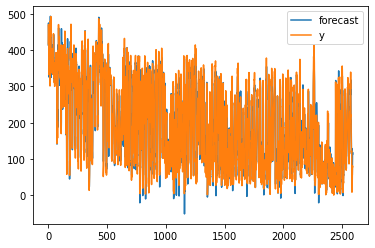

In [150]:
forecast=model_fit.forecast(steps=24)[0]
model_fit.plot_predict()

In [151]:
pd.DataFrame(forecast)

,0
0,115.068113
1,149.937180
2,177.554168
3,198.797006
4,213.437732
5,220.311192
6,220.622725
7,214.892419
8,203.972768
9,189.313771


In [152]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 2591
Model:                 ARIMA(4, 1, 4)   Log Likelihood              -13786.726
Method:                       css-mle   S.D. of innovations             49.486
Date:                Wed, 17 Feb 2021   AIC                          27593.452
Time:                        17:03:21   BIC                          27652.050
Sample:                             1   HQIC                         27614.687
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1093      0.288     -0.380      0.704      -0.673       0.455
ar.L1.D.y      0.9650      0.255      3.778      0.000       0.464       1.466
ar.L2.D.y      0.2517      0.430      0.585      0.559      -0.592       1.095
ar.L3.D.y      0.0356      0.245      0.145      0.884      -0.445       0.516
ar.L4.D.y     -0.3892      0.113     -3.458      0.001      -0.610      -0.169
ma.L1.D.y     -0.9266      0.251     -3.690      0.000      -1.419      -0.434
ma.L2.D.y     -0.4213      0.414     -1.018      0.309      -1.232       0.390
ma.L3.D.y     -0.0773      0.209     -0.369      0.712      -0.487       0.333
ma.L4.D.y      0.4656      0.114      4.099      0.000       0.243       0.688
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0299           -0.2571j            1.0615           -0.0389
AR.2            1.0299           +0.2571j            1.0615            0.0389
AR.3           -0.9841           -1.1454j            1.5101           -0.3630
AR.4           -0.9841           +1.1454j            1.5101            0.3630
MA.1            1.0377           -0.1281j            1.0456           -0.0195
MA.2            1.0377           +0.1281j            1.0456            0.0195
MA.3           -0.9547           -1.0263j            1.4017           -0.3693
MA.4           -0.9547           +1.0263j            1.4017            0.3693
-----------------------------------------------------------------------------
"""

Auto ARIMA using PYRAMID ARIMA

In [48]:
#!pip install pmdarima

In [49]:
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from pmdarima.arima.stationarity import ADFTest

In [50]:
adf_test = ADFTest(alpha=0.01)
adf_test.is_stationary(df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: is_stationary is deprecated and will be removed in a future release of pmdarima. Use should_diff instead.
  


(0.01, False)

In [63]:
Arima_model = auto_arima(train, start_p=1, start_q=1, max_p=5, max_q=5,
                          start_P=0, start_Q=0, max_P=4, max_Q=4,
                          m=4,seasonal=True, trace=True, d=1, D=1,
                          error_action='warn', suppress_warnings=True,
                          stepwise=True,  n_fits=24)
Arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[4]             : AIC=inf, Time=1.48 sec
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=23935.960, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=23328.455, Time=0.57 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=inf, Time=2.37 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=23842.318, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[4]             : AIC=23056.995, Time=0.90 sec
 ARIMA(1,1,0)(3,1,0)[4]             : AIC=22951.336, Time=1.50 sec
 ARIMA(1,1,0)(4,1,0)[4]             : AIC=22863.286, Time=2.27 sec
 ARIMA(1,1,0)(4,1,1)[4]             : AIC=inf, Time=5.75 sec
 ARIMA(1,1,0)(3,1,1)[4]             : AIC=inf, Time=4.30 sec
 ARIMA(0,1,0)(4,1,0)[4]             : AIC=22941.081, Time=1.00 sec
 ARIMA(2,1,0)(4,1,0)[4]             : AIC=22862.408, Time=3.00 sec
 ARIMA(2,1,0)(3,1,0)[4]             : AIC=22953.281, Time=1.92 sec
 ARIMA(2,1,0)(4,1,1)[4]             : AIC=inf, Time=8.65 sec
 ARIMA(2,1,0)(3,1,1)[4]             : AIC=inf, Ti

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 2073
Model:             SARIMAX(3, 1, 0)x(4, 1, 0, 4)   Log Likelihood              -11417.729
Date:                           Wed, 17 Feb 2021   AIC                          22851.458
Time:                                   16:32:14   BIC                          22896.533
Sample:                                        0   HQIC                         22867.980
                                          - 2073                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1981      0.019     10.624      0.000       0.162       0.235
ar.L2         -0.0246      0.023     -1.070      0.285      -0.070       0.020
ar.L3         -0.0811      0.023     -3.532      0.000      -0.126      -0.036
ar.S.L4       -0.7498      0.020    -38.372      0.000      -0.788      -0.712
ar.S.L8       -0.5962      0.025    -23.946      0.000      -0.645      -0.547
ar.S.L12      -0.3824      0.025    -15.519      0.000      -0.431      -0.334
ar.S.L16      -0.2261      0.020    -11.368      0.000      -0.265      -0.187
sigma2      3650.7367     76.601     47.659      0.000    3500.602    3800.871
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):               536.60
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               1.11   Skew:                            -0.23
Prob(H) (two-sided):                  0.19   Kurtosis:                         5.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""